# 1. Distribución binomial

Considere una población de individuos que no se reproducen, y que evolucionan en tiempo discreto. A cada paso de tiempo cada uno de ellos puede morir con probabilidad $d$. Calcule numéricamente la distribución de probabilidad de la población en función del tiempo (para algunos tiempos, y para un par de valores de d). Compare con la distribución binomial exacta.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from simulations import binomial_simulation

# Población viva en función del tiempo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N0 = 100  # Población inicial
d_values = [0.1, 0.3, 0.5, 0.8]  # Diferentes probabilidades de muerte
time_steps = 10  # Número de pasos de tiempo a considerar

# Simulación numérica
np.random.seed(42)  # Fijar semilla para reproducibilidad

def simulate_population(N0, d, time_steps):
    population = N0
    populations = [N0]
    for t in range(1, time_steps + 1):
        alive = np.random.binomial(population, 1 - d)
        populations.append(alive)
        population = alive
    return populations

# Resultados para diferentes valores de d
results = {d: simulate_population(N0, d, time_steps) for d in d_values}

# Comparación con la distribución binomial exacta
time_points = range(time_steps + 1)

# Gráficas
plt.figure(figsize=(16, 12))

for i, d in enumerate(d_values):
    plt.subplot(2, 2, i + 1)
    
    simulated_populations = results[d]
    exact_binom_means = [N0 * (1 - d) ** t for t in time_points]
    exact_binom_vars = [N0 * (1 - d) ** t * (1 - (1 - d) ** t) for t in time_points]
    
    plt.plot(time_points, simulated_populations, 'o-', label='Simulado')
    plt.plot(time_points, exact_binom_means, 's--', label='Binomial Media')
    plt.fill_between(time_points,
                     np.array(exact_binom_means) - 1.96 * np.sqrt(exact_binom_vars),
                     np.array(exact_binom_means) + 1.96 * np.sqrt(exact_binom_vars),
                     color='gray', alpha=0.2, label='Binomial 95% CI')
    
    plt.title(f'Probabilidad de muerte d = {d}')
    plt.xlabel('Tiempo')
    plt.ylabel('Población viva')
    plt.legend()

plt.tight_layout()
plt.show()

# Distribución de población para distintos $d$ y tiempo fijo

In [ ]:
# Parámetros
N0 = 100  # Población inicial
time_step = 4  # Probabilidad de muerte
num_simulations = 10000  # Número de simulaciones


simulation = binomial_simulation(num_simulations, N0)

In [ ]:
d_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  

plt.figure(figsize=(16, 8))
palette = sns.color_palette('deep', n_colors=len(d_values) + 1)

for i, d in enumerate(d_values):

    populations = simulation.simulate_population(d = d, time_step = time_step)
    
    # Histograma de la población viva
    plt.hist(populations, bins=np.arange(N0+1), density=True, alpha=0.5, label=f'$d$ = {d}', color=palette[i])
    
    # Distribución binomial exacta
    plt.plot(range(N0+1), binom.pmf(range(N0+1), N0, (1 - d) ** time_step), 'o--', color=palette[i])

plt.title(f'Histograma de la población viva y distribución binomial exacta para $t = {time_step}$')
plt.xlabel(f'Población viva a tiempo $t = {time_step}$')
plt.ylabel(f'P(n,t)')
plt.legend(title="Probabilidad de morir $d$:")
plt.grid(True)
plt.show()

# Distribución de población para distintos tiempos y $d$ fijo

In [ ]:
# Parámetros
N0 = 100  # Población inicial
d = 0.3  # Probabilidad de muerte
num_simulations = 10000  # Número de simulaciones

simulation = binomial_simulation(num_simulations, N0)

In [ ]:
time_steps = [1, 2, 3, 4, 5, 6, 7, 8]  # Diferentes números de pasos de tiempo a considerar

plt.figure(figsize=(16, 8))
palette = sns.color_palette('deep', n_colors=len(time_steps) + 1)

for i, time_step in enumerate(time_steps):
    
    populations = simulation.simulate_population(d=d, time_step=time_step)
    
    # Histograma de la población viva
    plt.hist(populations, bins=np.arange(N0+1), density=True, alpha=0.5, label=f'$t$ = {time_step}', color=palette[i])
    
    # Distribución binomial exacta
    plt.plot(range(N0+1), binom.pmf(range(N0+1), N0, (1 - d) ** time_step), 'o--', color=palette[i])

plt.title(f'Histograma de la población viva y distribución binomial exacta para $d = {d}$')
plt.xlabel(f'Población viva a tiempo $t$')
plt.ylabel(f'P(n,t)')
plt.legend(title="Tiempo:")
plt.grid(True)
plt.show()

# 2. Ecuaciones de Langevin

Considere una población continua $x(t)$, con una dinámica multiplicativa en tiempo discreto y un ruido aditivo: $$x(t + 1) = a x(t) + z(t),$$ donde la variable estocástica $z(t)$ tiene distribución gaussiana con media cero y desviación estándar $\sigma$. Simule una docena de trayectorias del sistema, partiendo de $x(0) = 1$ y usando $a = 1.05$, $\sigma = 0.2$, hasta tiempo $50$. Compare las trayectorias estocásticas con la correspondiente dinámica sin ruido, en un gráfico de $x$ en función del tiempo. Simule un ensemble de trayectorias y calcule la distribución de probabilidad $P(x, t)$, y grafíquela (ya sea en 3D, o usando t como parámetro). Haga lo mismo para una dinámica con ruido multiplicativo: $$x(t + 1) = a x(t) + z(t) x(t).$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from simulations import langevin_simulation

In [ ]:
# Parámetros del sistema
a = 1.05
sigma = 0.2
x0 = 1
time_steps = 50

num_trajectories = 12
ensemble_size = 100000

simulation = langevin_simulation(a, sigma, x0, time_steps)

In [ ]:
# Simulación de las trayectorias estocásticas
print('Simulación con ruido aditivo:')
trajectories_additive = simulation.simulate_trajectories_additive(num_trajectories=num_trajectories)
print('\nSimulación con ruido multiplicativo:')
trajectories_multiplicative = simulation.simulate_trajectories_multiplicative(num_trajectories=num_trajectories)

In [ ]:
# Dinámica sin ruido
x_deterministic = [x0 * (a ** t) for t in range(time_steps + 1)]

# Gráfico de las trayectorias estocásticas y la dinámica sin ruido
time_points = np.arange(time_steps + 1)
plt.figure(figsize=(14, 6))

# Ruido aditivo
plt.subplot(1, 2, 1)
for i in range(num_trajectories):
    plt.plot(time_points, trajectories_additive[i], alpha=0.75)
plt.plot(time_points, x_deterministic, 'k--', linewidth=2, label='Sin ruido')
plt.title('Trayectorias con ruido aditivo')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.legend()

# Ruido multiplicativo
plt.subplot(1, 2, 2)
for i in range(num_trajectories):
    plt.plot(time_points, trajectories_multiplicative[i], alpha=0.75)
plt.plot(time_points, x_deterministic, 'k--', linewidth=2, label='Sin ruido')
plt.title('Trayectorias con ruido multiplicativo')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Simulación del ensemble
print(f"Simulación con ruido aditivo:")
ensemble_additive = simulation.simulate_trajectories_additive(num_trajectories = ensemble_size)
print(f"Simulación con ruido multiplicativo:")
ensemble_multiplicative = simulation.simulate_trajectories_multiplicative(num_trajectories = ensemble_size)

In [ ]:
time_intervals = [10, 20, 30, 40, 50]

plt.figure(figsize=(14, 6))

# Ruido aditivo
plt.subplot(1, 2, 1)
for t in time_intervals:
    sns.histplot(ensemble_additive[:, t], kde=True, label=f't = {t}', bins=50)
plt.title('Distribución de P(x, t) con ruido aditivo')
plt.xlabel('x(t)')
plt.ylabel('Frecuencia')
plt.legend()
# Ruido multiplicativo
plt.subplot(1, 2, 2)
for t in time_intervals:
    ax = sns.histplot(ensemble_multiplicative[:, t], kde=True, label=f't = {t}', bins=500)
    ax.set_xlim(0, 150)
plt.title('Distribución de P(x, t) con ruido multiplicativo')
plt.xlabel('x(t)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Simulación estocástica

Considere un sistema con reproducción y competencia intraespecífica, del tipo:

\begin{aligned}
    A & \xrightarrow{b} A + A \\
    A + A & \xrightarrow{d} A
\end{aligned}

    
Simule la evolución de la población usando el algoritmo de Gillespie. Usando distintos valores de las tasas $b$ y $d$, y distintas condiciones iniciales, observe los distintos comportamientos, tanto transitorios como asintóticos. Grafique algunos casos característicos, comparándolos con la solución de la ecuación logística que da el comportamiento macroscópico. 

Para una elección de $b$ y $d$ que permita un estado estacionario positivo (por ejemplo, $b = 0.1$, $d = 0.001$ da un valor medio estacionario $\langle x \rangle = 100$), use múltiples realizaciones para calcular la distribución estacionaria $P(x)$. 

Para una elección de $b$ y $d$ que produzca extinciones por fluctuaciones ($b = 0.1$, $d = 0.02$, $n(0) = 10$), use múltiples realizaciones para calcular la distribución del tiempo de extinción.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from simulations import gillespie_simulation

# Elección de $b$ y $d$ para obtener un estado estacionario positivo 

In [24]:
b = 0.1 
d = 0.001
n0 = 10
T = 1000  # Tiempo máximo de simulación
ensemble_size = 10000

simulation = gillespie_simulation() 

In [ ]:
time_points, population = simulation.gillespie_algorithm(b = b, d = d, n0 = n0, T = T)
x_mean = np.mean(population[150:])
print(f'Valor medio de la población en estado estacionario: {x_mean}')

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time_points, population)
plt.axhline(y=x_mean, color='r', linestyle='--', label=f'Estado estacionario: $\\langle x \\rangle$ = {x_mean}')
plt.xlabel(f'Tiempo')
plt.ylabel(f'Población')
plt.title(f'Evolución de la población: $b={b}$, $d={d}$, $n_0={n0}$')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
population_at_T = []

for _ in tqdm(range(ensemble_size)):
    time_points, population = simulation.gillespie_algorithm(b = b, d = d, n0 = n0, T = T)
    population_at_T.append(population[-1])

Text(0, 0.5, 'Frecuencia')

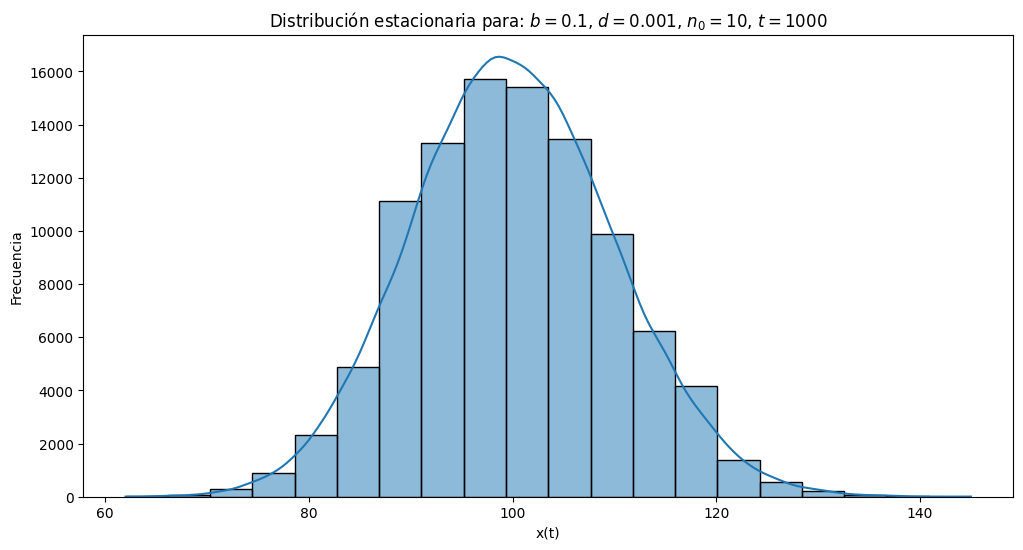

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(population_at_T, kde=True, bins=20)
plt.title(f'Distribución estacionaria para: $b={b}$, $d={d}$, $n_0={n0}$, $t = {T}$')
plt.xlabel('x(t)')
plt.ylabel('Frecuencia')

# Elección de $b$ y $d$ para que se produzcan extinciones por fluctuaciones

In [ ]:
b = 0.1
d = 1
n0 = 5
T = 1000  # Tiempo máximo de simulación

simulation = gillespie_simulation() 

In [ ]:
time_points, population = simulation.gillespie_algorithm(b = b, d = d, n0 = n0, T = T)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time_points, population)
plt.xlabel(f'Tiempo')
plt.ylabel(f'Población')
plt.title(f'Evolución de la población: $b={b}$, $d={d}$, $n_0={n0}$')
plt.show()